In [74]:
# Goal: Predict which apps will have the highest ratings
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# 1. Load the data file using pandas
df = pd.read_csv("googleplaystore.csv")


In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
# 2. Checking for Null Values

In [6]:
# Performing Data Wrangling

# 2. Checking for null values

df_missing=df.isna()
df_missing.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#2. Get the number of null values for each column.
for column in df_missing.columns.values.tolist():
    print(column)
    print(df_missing[column].value_counts())
    print("")

App
False    10841
Name: App, dtype: int64

Category
False    10841
Name: Category, dtype: int64

Rating
False    9367
True     1474
Name: Rating, dtype: int64

Reviews
False    10841
Name: Reviews, dtype: int64

Size
False    10841
Name: Size, dtype: int64

Installs
False    10841
Name: Installs, dtype: int64

Type
False    10840
True         1
Name: Type, dtype: int64

Price
False    10841
Name: Price, dtype: int64

Content Rating
False    10840
True         1
Name: Content Rating, dtype: int64

Genres
False    10841
Name: Genres, dtype: int64

Last Updated
False    10841
Name: Last Updated, dtype: int64

Current Ver
False    10833
True         8
Name: Current Ver, dtype: int64

Android Ver
False    10838
True         3
Name: Android Ver, dtype: int64



In [8]:
#3. Drop records with nulls in any of the columns. 
df.dropna(inplace=True)

In [9]:
df.shape

(9360, 13)

In [10]:
# 4. Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [11]:
# 4.1 Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
df["Size"].describe()

count                   9360
unique                   413
top       Varies with device
freq                    1637
Name: Size, dtype: object

In [12]:
def to_numeric(size_string):
    if size_string.endswith("M"):
        size_string=size_string[0:-1]
        size_string=float(size_string)*1000
    elif size_string.endswith("k"):
        size_string=size_string[0:-1]
    elif size_string=="Varies with device":
        size_string=0
    return size_string

In [13]:
df["Extracted_Size"]=df["Size"].apply(to_numeric)

In [14]:
df["Extracted_Size"].dtype

dtype('O')

In [15]:
df["Extracted_Size"]=df["Extracted_Size"].astype("float")

In [16]:
df["Extracted_Size"].dtype

dtype('float64')

In [17]:
# 4.2 Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).
df["Reviews"]=df["Reviews"].astype("float")

In [18]:
df["Installs"].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [19]:
def formatting(installs):
    if "+" in installs:
        installs=installs[0:-1]
    if "," in installs:
        installs=installs.replace(",","")
    installs=int(installs)  
    return installs

In [20]:
df["Installs"]=df["Installs"].apply(formatting)

In [21]:
#4. 4 Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [22]:
def price_formatting(price):
    if "$" in price:
        price=price.replace("$","")
    price=float(price)
    return price

In [23]:
df["Price"]=df["Price"].apply(price_formatting)

In [24]:
#5. Sanity checks:

#Average rating should be between 1 and 5 as only these values are allowed on the play store.
#Drop the rows that have a value outside this range.


df["Rating"][df["Rating"]<1]

Series([], Name: Rating, dtype: float64)

In [25]:
df["Rating"][df["Rating"]>5] # There are no rows with values outside the range 1-5

Series([], Name: Rating, dtype: float64)

In [26]:
#5.2 Reviews should not be more than installs as only those who installed can review the app. 
#If there are any such records, drop them.

df[["Reviews","Installs"]][df["Reviews"]>df["Installs"]]

,Reviews,Installs
2454,4.0,1
4663,10249.0,10000
5917,2.0,1
6700,7.0,5
7402,11.0,10
8591,20.0,10
10697,2.0,1


In [27]:
# shape before dropping
df.shape

(9360, 14)

In [28]:
df.drop(df[["Reviews","Installs"]][df["Reviews"]>df["Installs"]].index, inplace = True)

In [29]:
# after dropping
df.shape

(9353, 14)

In [30]:
# 5.3 For free apps (type = “Free”), the price should not be >0. Drop any such rows.

df["Price"][df["Type"]=="Free"][df["Price"]==0]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 8711, dtype: float64

In [31]:
df["Price"][df["Type"]=="Free"][df["Price"]>0] ## no rows to drop

Series([], Name: Price, dtype: float64)

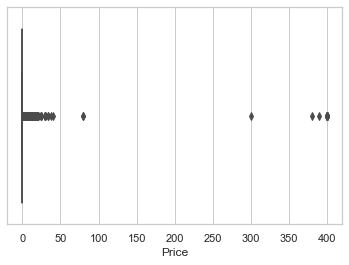

In [32]:
# Performing univariate analysis

# Boxplot for Price
sns.set_theme(style="whitegrid")
ax= sns.boxplot(x=df["Price"])

#Are there any outliers? Think about the price of usual apps on Play Store.
# Observation: Yes, there are outliers that are $300 and above

In [33]:
df["Reviews"].describe()

count    9.353000e+03
mean     5.147606e+05
std      3.146169e+06
min      1.000000e+00
25%      1.870000e+02
50%      5.967000e+03
75%      8.174700e+04
max      7.815831e+07
Name: Reviews, dtype: float64

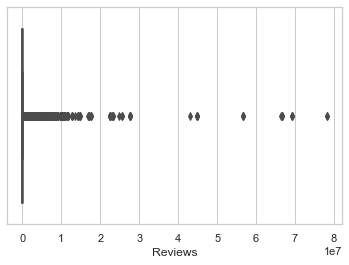

In [34]:
#Boxplot for Reviews
# Boxplot for Price

ax= sns.boxplot(x=df["Reviews"])

#ax.set(ylim=(0,10))
#Are there any apps with very high number of reviews? Do the values seem right?
# Observation: There are a few apps with a very high number of reviews, the highest being around 80 million. 
#These values seem a bit too high and will skew the analysis

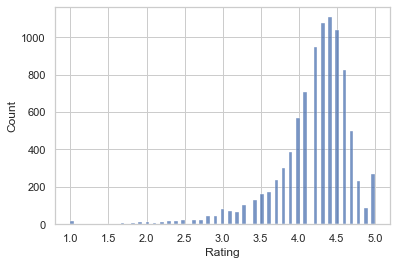

In [35]:
#Histogram for Rating
ax= sns.histplot(x=df["Rating"]) 
# Observation 
# The ratings are distributed around a mean value of 4.25, and is left-skewed. 



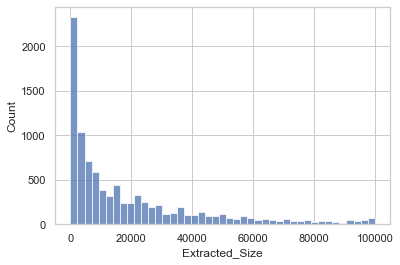

In [36]:
ax= sns.histplot(x=df["Extracted_Size"]) 
# Observation: Has outliers at around 1 million
# The distribution is Right-skewed 
# Note: a size of zero means that it was marked " Varies ..."

In [37]:
# 6. Outlier Treatment
# 6.1 Price
# 6.1.1 Check out the records with very high price
df[df["Price"]>200]
#  Is 200 indeed a high price?
# Yes, most prices are below $50, as we can see from the box plot

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Extracted_Size
4197,most expensive app (H),FAMILY,4.3,6.0,1.5M,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up,1500.0
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26M,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,26000.0
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3M,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,7300.0
5351,I am rich,LIFESTYLE,3.8,3547.0,1.8M,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,1800.0
5354,I am Rich Plus,FAMILY,4.0,856.0,8.7M,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,8700.0
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2.6M,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up,2600.0
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4.7M,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,4700.0
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2.9M,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up,2900.0
5358,I am Rich!,FINANCE,3.8,93.0,22M,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up,22000.0
5359,I am rich(premium),FINANCE,3.5,472.0,965k,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up,965.0


In [38]:
# shape before dropping
df.shape

(9353, 14)

In [39]:
# 6.1.2 Drop these as most seem to be junk apps
#df.drop(df[["Reviews","Installs"]][df["Reviews"]>df["Installs"]].index, inplace = True)
df.drop(df[df["Price"]>200].index,inplace=True)

In [40]:
# after dropping
df.shape # records have been dropped

(9338, 14)

In [41]:
#6.2 Reviews:
#Drop records having more than 2 million reviews.

df[df["Reviews"]>2000000].size # no of apps having more than 2 mil reviews

6342

In [42]:
df.drop(df[df["Reviews"]>2000000].index,inplace=True)
df.shape # rows have decreased to 8885

(8885, 14)

In [43]:
#6.3 Installs
#6.3.1 Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
df["Installs"].quantile([0.10,0.25,0.50,0.70,0.90,0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [44]:
#6.3.2 Decide a threshold as cutoff for outlier and drop records having values more than that

df[df["Installs"]>10000000].size # Number of records beyond the 90th percentile

5446

In [45]:
# dropping records beyond the 90th percentile
df.drop(df[df["Installs"]>10000000].index,inplace=True)

In [46]:
df.shape

(8496, 14)

<AxesSubplot:xlabel='Rating', ylabel='Price'>

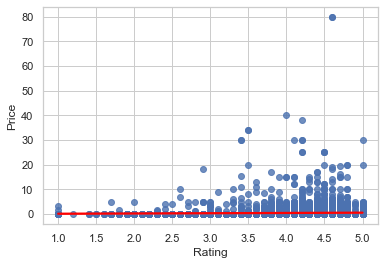

In [47]:
# 7. Bivariate Analysis

#7.1 scatter plot/joinplot for Rating vs. Price
sns.regplot(x="Rating",y="Price",data=df,line_kws={"color": "red"})
#7.1.1 What pattern do you observe? Does rating increase with price?
# There is almost no correlation between rating and price. Rating does not necessarily increase with price.

<AxesSubplot:xlabel='Rating', ylabel='Extracted_Size'>

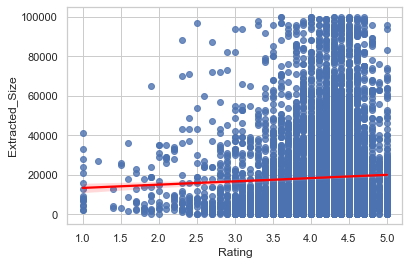

In [48]:
# 7.2 Make scatter plot/joinplot for Rating vs. Size
sns.regplot(x="Rating",y="Extracted_Size",data=df,line_kws={"color": "red"})
#7.2.2 There is a weak correlation between rating and size.
# Being a larger size does not mean an app will get a better rating.

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

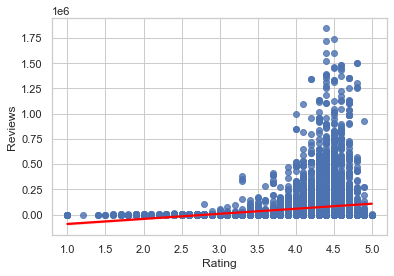

In [49]:
#7.3 Make scatter plot/joinplot for Rating vs. Reviews
sns.regplot(x="Rating",y="Reviews",data=df,line_kws={"color": "red"})
# 7.3.1 Generally, a better rating does seem to be given to apps with more reviews. 
# However, a review does not guarantee a better rating

In [50]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Extracted_Size'],
      dtype='object')

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

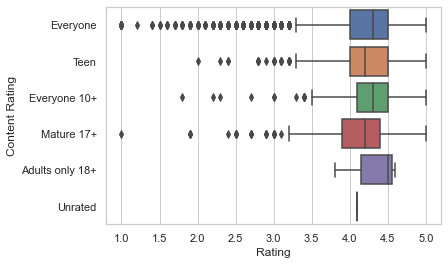

In [51]:
# 7.4 Make boxplot for Rating vs. Content Rating
sns.boxplot(x="Rating",y="Content Rating",data=df)
# 7.4.1 Is there any difference in the ratings? Are some types liked better?
# Every category generally has similar averages and inter-quartile ranges, between 4-4.5 stars.
# 'Everyone' has more frequent lower outliers compared to the other categories.
# The "Adults only 18+" category has the highest median rating.
# It seems like the more mature the content, the higher the consistency of its rating.

<AxesSubplot:xlabel='Rating', ylabel='Category'>

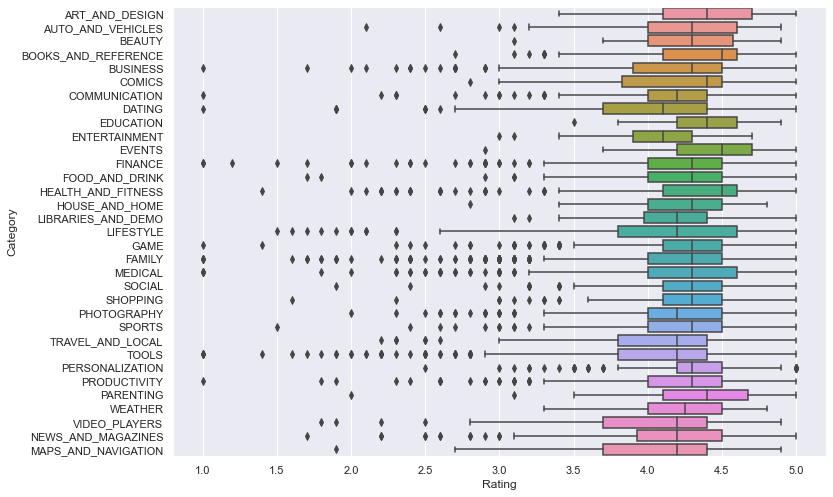

In [52]:
# 4.5 Make boxplot for Ratings vs. Category

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x="Rating",y="Category",data=df)
#4.5.1 Which genre has the best ratings?
#"Entertainment" seems to have the best ratings

In [53]:
# 8 Data Preprocessing
# create a copy of the dataframe to make all the edits.
inp1=df.copy()

In [54]:
#8.1.Reviews and Install have some values that are still relatively very high. 
#Before building a linear regression model, you need to reduce the skew.
#Apply log transformation (np.log1p) to Reviews and Installs.
inp1[["Reviews","Installs"]]=inp1[["Reviews","Installs"]].apply(np.log1p)

In [55]:
#8.2 Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.
inp1.drop(columns=["App","Last Updated","Current Ver", "Android Ver"], inplace=True)

In [56]:
#8.3 Get dummy columns for Category, Genres, and Content Rating. 
inp2=pd.get_dummies(inp1[["Category","Genres","Content Rating","Type"]])

In [57]:
# concatenating inp1 and inp2
df1=pd.concat([inp1,inp2],axis=1)
#dropping original Category, Genres, and Content Rating columns

df1.drop(columns=["Category","Genres","Content Rating","Type","Size"],inplace=True)# Replaced Size with Extracted_Size


In [91]:
# attempt 3
# 9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.
df_train,df_test=train_test_split(df1,test_size=0.3,random_state=0)

In [93]:
df_train.shape

(5947, 161)

In [92]:
# split df_train into x_data, y_data
# turn that into x_train, y_train
x_data_df_train=df_train.drop(columns=["Price"])


(5947, 160)

In [97]:
y_data_df_train=df_train["Price"]

In [96]:
#10. Separate the dataframes into X_train, y_train, X_test, and y_test.
x_train, y_train,x_train =train_test_split(x_df_train,y_df_train,test_size=0.3,random_state=0)
#x_test, y_test =train_test_split(df_test,test_size=0.3,random_state=0)

ValueError: too many values to unpack (expected 2)

In [87]:
# ATTEMPT 2
y_data =df1["Price"]
x_data=df1.drop(columns=["Price"],inplace=False)

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)

In [58]:
# ATTTEMPT 1
# 9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.
df_train,df_test=train_test_split(df1,test_size=0.3,random_state=0)

In [59]:
df_train.shape,df_test.shape

((5947, 161), (2549, 161))

In [90]:
#10. Separate the dataframes into X_train, y_train, X_test, and y_test.
x_train, y_train =train_test_split(df_train,test_size=0.3,random_state=0)
x_test, y_test =train_test_split(df_test,test_size=0.3,random_state=0)

In [82]:
# 11. Model building
# 11.1 Use linear regression as the technique



In [62]:
# STEPS:
# 1. SELECT VARIABLES TO FIND BUILD MODELS WITH
# 2. FIND CORRELATIONS BETWEEN EACH OF THEM, SELECT FOR THE BEST
# 3. SINGLE LINEAR REGRESSION
# 4. MULTIPLE LINEAR REGRESSION

In [63]:
# Step1:
df_train.head()

,Rating,Reviews,Installs,Price,Extracted_Size,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Free,Type_Paid
6169,4.8,4.499810,6.908755,0.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5431,4.6,8.555644,11.512935,0.0,64000.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
9036,4.2,6.456770,11.512935,0.0,4000.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6406,4.2,8.125631,11.512935,0.0,62000.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
10113,4.4,10.898275,16.118096,0.0,21000.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [64]:
# Features visually analyzed up till now:
x_train.head()

,Rating,Reviews,Installs,Price,Extracted_Size,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Free,Type_Paid
6,3.8,5.187386,10.819798,0.0,19000.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5304,4.4,2.302585,8.517393,0.0,4200.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5981,4.4,2.197225,6.908755,0.0,14000.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3754,4.1,10.947432,15.424949,0.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
846,4.3,12.238215,16.118096,0.0,21000.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [66]:
Z = x_train.drop(columns="Price",inplace=False) # Using all columns except Price for the model
lm=LinearRegression()

In [83]:
# fitting the model
lm.fit(Z, y_train['Price'])

ValueError: Found input variables with inconsistent numbers of samples: [4162, 1785]

In [72]:
# predicted values
Yhat=lm.predict(Z)

C:\Users\skv08\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\skv08\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


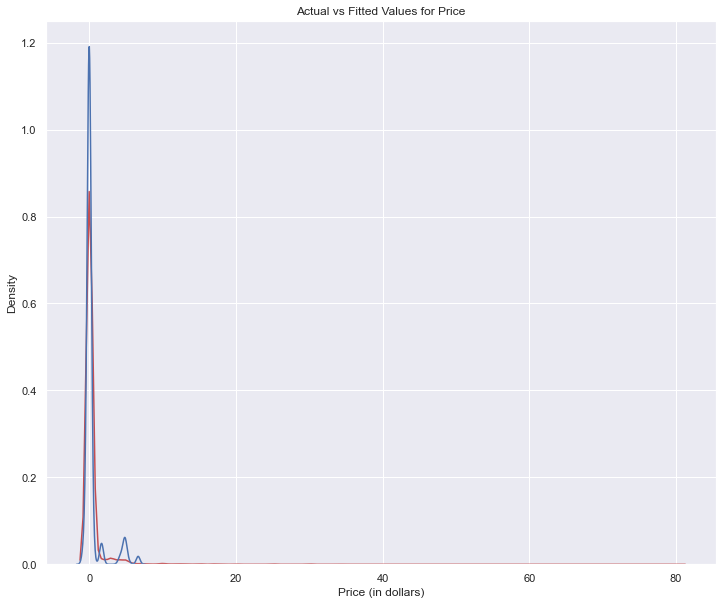

In [79]:
# plotting, (code from L5- Review Model Development)
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(x_train["Price"], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
#plt.xticks(range(0, 5))


plt.show()
plt.close()

In [ ]:
# Calculating R squared
lre.score(Z,x_train)

In [ ]:
# Trying to improve model using Polynomial Regression
